인공 신경망이 순전파 과정을 진행하여 예측값과 실제값의 오차를 계산하였을 때 어떻게 역전파 과정에서 경사 하강법을 사용하여 가중치를 업데이트하는지 직접 계산을 통해 이해해봅시다.

# 1. 인공 신경망의 이해(Neural Network Overview)

---

우선 예제를 위해 사용될 인공 신경망을 소개합니다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가집니다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용합니다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용합니다.

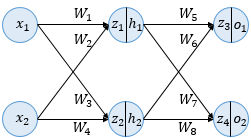

위의 그림은 여기서 사용할 인공 신경망의 모습을 보여줍니다. 은닉층과 출력층의 모든 뉴런에서 변수 $z$가 존재하는데 여기서 변수 $z$는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미합니다. 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태입니다. 즉, 활성화 함수의 입력을 의미합니다. $z$ 우측의 |를 지나서 존재하는 변수 $h$ 또는 $o$는 $z$가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미합니다. 이번 역전파 예제에서는 인공 신경망에 존재하는 모든 가중치 $W$에 대해서 역전파를 통해 업데이트하는 것을 목표로합니다. 해당 인공 신경망은 편향 $b$는 고려하지 않습니다.

# 2. 순전파(Forward Propagation)

---

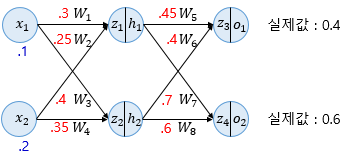

주어진 값이 위의 그림과 같을 때 순전파를 진행해봅시다. 위의 그림에서 소수점 앞의 0은 생략하였습니다. 예를 들어 .25는 0.25를 의미합니다. 파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미합니다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기합니다.

각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 됩니다. $z_1$과 $z_2$는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당됩니다.

$$
z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08
$$

$$
z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11
$$

$z_1#과 $z_2$는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값입니다. 식에서는 각각 $h_1$과 $h_2$에 해당되며, 아래의 결과와 같습니다.

$$h_{1}=sigmoid(z_{1}) = 0.51998934$$

$$h_{2}=sigmoid(z_{2}) = 0.52747230$$

$h_1$과 $h_2$ 이 두 값은 다시 출력층의 뉴런으로 향하게 되는데 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 됩니다. 식에서는 각각 $z_3$과 $z_4$에 해당됩니다.

$$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$$

$$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$$

$z_3$과 $z_4$이 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값입니다. 실제값을 예측하기 위한 값으로서 예측값이라고도 부릅니다.

$$o_{1}=sigmoid(z_{3})=0.60944600$$

$$o_{2}=sigmoid(z_{4})=0.66384491$$

이제 해야할 일은 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것입니다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용합니다. 식에서는 실제값을 target이라고 표현하였으며, 순전파를 통해 나온 예측값을 output으로 표현하였습니다. 그리고 각 오차를 모두 더하면 전체 오차 $E_{total}$가 됩니다.

$$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$$

$$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$$

$$E_{total}=E_{o1}+E_{o2}=0.02397190$$

# 3. 역전파 1단계(BackPropagation Step 1)

---

순전파가 입력층에서 출력층으로 향한다면 역전파는 반대로 **출력층에서 입력층 방향으로 계산** 하면서 가중치를 업데이트해갑니다. 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계, 그리고 N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계라고 해봅시다.

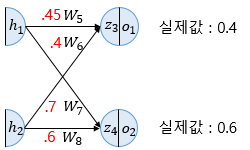

역전파 1단계에서 업데이트 해야 할 가중치는 $W_{5}, W_{6}, W_{7}, W_{8}$ 총 4개입니다. 원리 자체는 동일하므로 우선 $W_5$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 $W_5$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_{5}}$ 를 계산해야 합니다.

 
$\frac{∂E_{total}}{∂W_{5}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$$\frac{∂E_{total}}{∂W_{5}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{5}}$$

위의 식에서 우변의 세 개의 각 항에 대해서 순서대로 계산해봅시다. 우선 첫번째 항에 대해서 계산해보겠습니다. 미분을 진행하기 전에 $E_{total}$의 값을 상기해봅시다. $E_{total}$은 앞서 순전파를 진행하고 계산했던 전체 오차값입니다. 식은 다음과 같습니다.

$$E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$$

이에 $\frac{∂E_{total}}{∂o_{1}}$는 다음과 같습니다.

$$\frac{∂E_{total}}{∂o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$$

$$\frac{∂E_{total}}{∂o_{1}}=-(target_{o1}-output_{o1})=-(0.4-0.60944600)=0.20944600$$

이제 두번째 항을 주목해봅시다. $o_1$이라는 값은 시그모이드 함수의 출력값입니다. 그런데 시그모이드 함수의 미분은 $f(x) \text{×} (1-f(x))$입니다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해둡시다. 이에 따라서 두번째 항의 미분 결과는 다음과 같습니다.

(시그모이드 함수 미분 참고 링크 : https://en.wikipedia.org/wiki/Logistic_function#Derivative)

$$\frac{∂o_{1}}{∂z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$$

마지막으로 세번째 항은 $h_1$의 값과 동일합니다.

$$\frac{∂z_{3}}{∂W_{5}}=h_{1}=0.51998934$$

우변의 모든 항을 계산하였습니다. 이제 이 값을 모두 곱해주면 됩니다.

$$\frac{∂E_{total}}{∂W_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔습니다! 하이퍼파라미터에 해당되는 학습률(learning rate) $\alpha$는 0.5라고 가정합니다.

$$W_{5}^{+}=W_{5}-α\frac{∂E_{total}}{∂W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$$

이와 같은 원리로 $W_{6}^{+},\ W_{7}^{+},\ W_{8}^{+}$을 계산할 수 있습니다.

$$\frac{∂E_{total}}{∂W_{6}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{6}} → W_{6}^{+}=0.38685205$$

$$\frac{∂E_{total}}{∂W_{7}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{7}} → W_{7}^{+}=0.69629578$$

$$\frac{∂E_{total}}{∂W_{8}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{8}} → W_{8}^{+}=0.59624247$$

# 4. 역전파 2단계(BackPropagation Step 2)

---

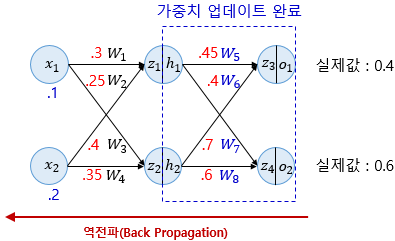

1단계를 완료하였다면 이제 입력층 방향으로 이동하며 다시 계산을 이어갑니다. 위의 그림에서 빨간색 화살표는 순전파의 정반대 방향인 역전파의 방향을 보여줍니다. 현재 인공 신경망은 은닉층이 1개밖에 없으므로 이번 단계가 마지막 단계입니다. 하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한 단계씩 계속해서 계산해가야 합니다.

이번 단계에서 계산할 가중치는 $W_{1}, W_{2}, W_{3}, W_{4}$입니다. 원리 자체는 동일하므로 우선 $W_1$에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 $W_1$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_{1}}$ 를 계산해야 합니다.


$\frac{∂E_{total}}{∂W_{1}}$ 를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$$\frac{∂E_{total}}{∂W_{1}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂W_{1}}$$

위의 식에서 우변의 첫번째항인 $\frac{∂E_{total}}{∂h_{1}}$는 다음과 같이 다시 식을 풀어서 쓸 수 있습니다.

$$\frac{∂E_{total}}{∂h_{1}} = \frac{∂E_{o1}}{∂h_{1}} + \frac{∂E_{o2}}{∂h_{1}}$$

위의 식의 우변의 두 항을 각각 구해봅시다. 우선 첫번째 항 $\frac{∂E_{o1}}{∂h_{1}}$에 대해서 항을 분해 및 계산해보겠습니다.

$$\frac{∂E_{o1}}{∂h_{1}} = \frac{∂E_{o1}}{∂z_{3}} \text{×} \frac{{∂z_{3}}}{∂h_{1}} = \frac{∂E_{o1}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{{∂z_{3}}}{∂h_{1}}$$

$$= -(target_{o1}-output_{o1}) \text{×} o_{1}\text{×}(1-o_{1}) \text{×} W_{5}$$

$$= 0.20944600 \text{×} 0.23802157 \text{×} 0.45 = 0.02243370$$

이와 같은 원리로 $\frac{∂E_{o2}}{∂h_{1}}$ 또한 구합니다.

$$\frac{∂E_{o2}}{∂h_{1}} = \frac{∂E_{o2}}{∂z_{4}} \text{×} \frac{{∂z_{4}}}{∂h_{1}} = \frac{∂E_{o2}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{{∂z_{4}}}{∂h_{1}} = 0.00997311$$

$$\frac{∂E_{total}}{∂h_{1}} = 0.02243370 + 0.00997311 = 0.03240681$$

이제 $\frac{∂E_{total}}{∂W_{1}}$를 구하기 위해서 필요한 첫번째 항을 구했습니다. 나머지 두 항에 대해서 구해보도록 하겠습니다.

$$\frac{∂h_{1}}{∂z_{1}} = h_{1}\text{×}(1-h_{1}) = 0.51998934(1-0.51998934)=0.24960043$$

$$\frac{∂z_{1}}{∂W_{1}} = x_{1} = 0.1$$

즉, $\frac{∂E_{total}}{∂W_{1}}$는 다음과 같습니다.

$$\frac{∂E_{total}}{∂W_{1}} = 0.03240681 \text{×} 0.24960043 \text{×} 0.1 = 0.00080888$$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 수 있습니다.

$$W_{1}^{+}=W_{1}-α\frac{∂E_{total}}{∂W_{1}}=0.1- 0.5 \text{×} 0.00080888=0.29959556$$

이와 같은 원리로 $W_{2}^{+},\ W_{3}^{+},\ W_{4}^{+}$을 계산할 수 있습니다.

$$\frac{∂E_{total}}{∂W_{2}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂W_{2}}  → W_{2}^{+}=0.24919112$$

$$\frac{∂E_{total}}{∂W_{3}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{3}}  → W_{3}^{+}=0.39964496$$

$$\frac{∂E_{total}}{∂W_{4}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{4}} → W_{4}^{+}=0.34928991$$

# 5. 결과 확인

---

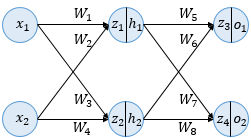

업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인해보겠습니다.

$$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.29959556 \text{×} 0.1 + 0.24919112 \text{×} 0.2= 0.07979778$$

$$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.39964496 \text{×} 0.1 + 0.34928991 \text{×} 0.2= 0.10982248$$

$$h_{1}=sigmoid(z_{1}) = 0.51993887$$

$$h_{2}=sigmoid(z_{2}) = 0.52742806$$

$$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.43703857 \text{×} h_{1} + 0.38685205 \text{×} h_{2} = 0.43126996$$

$$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.69629578 \text{×} h_{1} + 0.59624247 \text{×} h_{2} = 0.67650625$$

$$o_{1}=sigmoid(z_{3})=0.60617688$$

$$o_{2}=sigmoid(z_{4})=0.66295848$$

$$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02125445$$

$$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00198189$$

$$E_{total}=E_{o1}+E_{o2}=0.02323634$$

기존의 전체 오차 $E_{total}$가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있습니다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말합니다.